## Зависимостный парсинг (Dependency parsing)

А чтобы было удобнее, установим ещё spacy_udpipe. Это spacy-подобный интерфейс к udpipe.

In [1]:
import spacy_udpipe

import numpy as np
import pandas as pd

from utils import df_preparation, get_word_location, make_plot, clustering

In [2]:
task = 'wiki-wiki' #'active-dict' 'bts-rnc' 'wiki-wiki'

In [3]:
train_df = pd.read_csv(f'../russe-wsi-kit/data/main/{task}/train.csv', delimiter='\t')

In [4]:
train_df = df_preparation(train_df, task)

In [5]:
train_df

,context_id,word,gold_sense_id,predict_sense_id,positions,context,word_form
0,1,замок,1,NaN,"[0, 5]",замок владимира мономаха в любече . многочисле...,замок
1,2,замок,1,NaN,"[11, 16]","шильонский замок замок шильйон ( ) , известный...",замок
2,3,замок,1,NaN,"[299, 304]",проведения архитектурно - археологических рабо...,замок
3,4,замок,1,NaN,"[111, 116]","топи с . , л . белокуров легенда о завещании м...",замок
4,5,замок,1,NaN,"[134, 139]",великий князь литовский гедимин после успешной...,замок
...,...,...,...,...,...,...,...
434,435,бор,2,NaN,"[10, 13]",ленточный бор ле́нточные бо́ры — сосновые трав...,бор
435,436,бор,2,NaN,"[101, 104]","в окрестностях барнаула , составляет — км . н...",бор
436,437,бор,2,NaN,"[17, 20]",также в сосновом бору открыта секция биатлона ...,бор
437,438,бор,2,NaN,"[183, 186]","экспресс банк , мособлбанк , внешпромбанк , ба...",бор


In [6]:
spacy_udpipe.download("ru")

Already downloaded a model for the 'ru' language


In [7]:
nlp = spacy_udpipe.load("ru")

In [25]:
def get_dep(word, text):
    doc = nlp(text)
    for token in doc:
        if token.lemma_ == word or token.lemma_ == 'суд':
            return token.dep_
    return None

In [26]:
%%time
train_df['dep'] = train_df.apply(lambda x: get_dep(x['word'], x['context']), axis=1)

CPU times: user 14.4 s, sys: 36.6 ms, total: 14.5 s
Wall time: 14.5 s


In [27]:
train_df = train_df.sort_values(by='dep')
train_df

,context_id,word,gold_sense_id,predict_sense_id,positions,context,word_form,dep
141,142,лук,1,NaN,"[19, 22]",английский длинный лук английский длинный лук ...,лук,ROOT
374,375,суда,2,NaN,"[23, 27]",пограничные патрульные суда проекта с погранич...,суда,ROOT
348,349,суда,2,NaN,"[23, 27]",пограничные патрульные суда проекта с погранич...,суда,ROOT
204,205,лук,2,NaN,"[0, 3]","лук победный лук победоно́сный , или лук побе́...",лук,ROOT
155,156,лук,1,NaN,"[17, 20]","японский длинный лук , , или обычно просто пре...",лук,ROOT
...,...,...,...,...,...,...,...,...
58,59,замок,1,NaN,"[99, 104]",окончательно черты замковой архитектуры сохран...,замок,parataxis
17,18,замок,1,NaN,"[11, 16]",стерлинг ( замок ) замок стерлинг ( ) — находи...,замок,parataxis
47,48,замок,1,NaN,"[11, 16]",стерлинг ( замок ) замок стерлинг ( ) — находи...,замок,parataxis
376,377,суда,2,NaN,"[26, 30]",вспомогательные корабли и суда вмф россии и сс...,суда,None


In [31]:
goal_word = 'суда'

In [32]:
word_df = train_df[train_df['word'] == goal_word]

In [33]:
word_df

,context_id,word,gold_sense_id,predict_sense_id,positions,context,word_form,dep
374,375,суда,2,NaN,"[23, 27]",пограничные патрульные суда проекта с погранич...,суда,ROOT
348,349,суда,2,NaN,"[23, 27]",пограничные патрульные суда проекта с погранич...,суда,ROOT
375,376,суда,2,NaN,"[289, 293]","были весельными , но в дальнейшем ( в соответс...",суда,conj
339,340,суда,1,NaN,"[292, 296]",", что делают чаще , в суде , принявшим такое р...",суда,conj
321,322,суда,1,NaN,"[16, 20]","книга страшного суда кни́га стра́шного суда́ ,...",суда,nmod
...,...,...,...,...,...,...,...,...
297,298,суда,1,NaN,"[73, 77]","в суд , принявший заочное решение , заявление ...",суда,obl
316,317,суда,1,NaN,"[230, 234]",) решает вопросы об обращении в конституционны...,суда,obl
381,382,суда,2,NaN,"[0, 4]",суда викингов флот викингов состоял преимущест...,суда,obl
376,377,суда,2,NaN,"[26, 30]",вспомогательные корабли и суда вмф россии и сс...,суда,None


<AxesSubplot:>

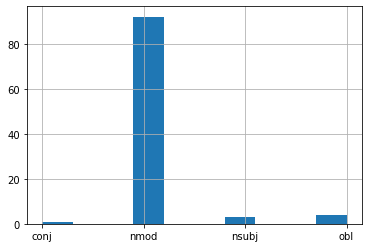

In [34]:
word_df[word_df['gold_sense_id'] == 1]['dep'].hist()

<AxesSubplot:>

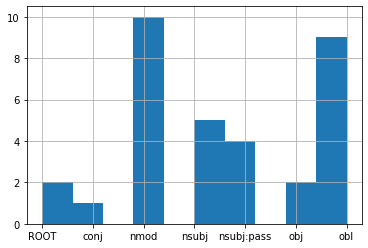

In [35]:
word_df[word_df['gold_sense_id'] == 2]['dep'].hist()